### I decided to treat this classification problem by creating a new binary variable affair(did the woman have at least one affair?) and trying to predict the classification for each woman.

### Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

Description of Variables
    The dataset contains 6366 observations of 9 variables:
    
    rate_marriage: woman's rating of her marriage(1=very poor, 5=very good)
    age: woman's age
    yrs_married: number of years married    
    children: number of children    
    religious: woman's rating off how religious she is (1= not religious, 4= strongly religious)    
    educ: level odf education(9 = grade school, 12 = high school, 14 = some college, 16 = college graduate school, 20 = advance degree)    
    occupation: woman's occupation (1= student, 2 = farming/semi-skilled/unskilled, 3= white collar, 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
    occupation_husb: husband's occupation (same coding as above)
    affairs: time spent in extra-maritial affairs

Code to loading data and modules

    import numpy as np
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from patsy import dmatrices
    from sklearn.linear_model import LogisticRegression
    from sklearn.cross_validation import train_test_split
    from sklearn import metrics
    from sklearn.cross_validation import cross_val_score
    dta = sm.datasets.fair.load_pandas().data

#### add "affair" column: 1 represents having affairs, 0 represents not

    dta['affair'] = (dta.affairs > 0).astype(int)
    y, X = dmatrices ('affair~rate_marriage+ age+yrs_married+children+\ religious + edu + C(occupation) + C(occupation_husb)', dta, return_dtype="dataframe")

    X=X.rename(columns= {'C(occupation)[T.2.0]':'occ_2',
                    'C(occupation)[T.3.0]':'occ_3',
                    'C(occupation)[T.4.0]':'occ_4',
                    'C(occupation)[T.5.0]':'occ_5',
                    'C(occupation)[T.6.0]':'occ_6',
                    'C(occupation_husb)[T.2.0]':'occ_husb_2',
                    'C(occupation_husb)[T.3.0]':'occ_husb_3',
                    'C(occupation_husb)[T.4.0]':'occ_husb_4',
                    'C(occupation_husb)[T.5.0]':'occ_husb_5',
                    'C(occupation_husb)[T.5.0]':'occ_husb_6',})

    y = np.ravel(y)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
dta = sm.datasets.fair.load_pandas().data

In [2]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
# add column affair indicating the woman has an affair
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


### Data Exploration

In [4]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [5]:
dta.affair.sum()

2053

In [6]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


### Data Visualization

In [7]:
%matplotlib inline

Text(0, 0.5, 'Frequency')

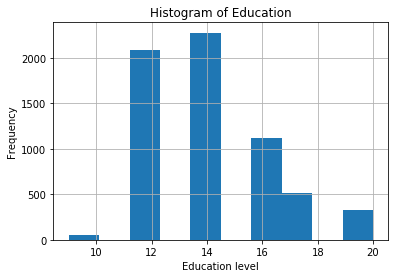

In [8]:
# Histogrm of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

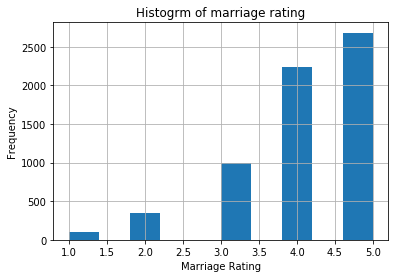

In [9]:
# Histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogrm of marriage rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Freq')

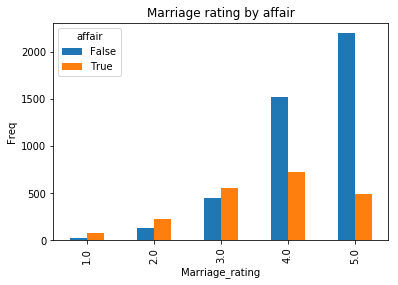

In [10]:
#barplot of marriage rating grouped by affair
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind = 'bar')
plt.title('Marriage rating by affair')
plt.xlabel('Marriage_rating')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

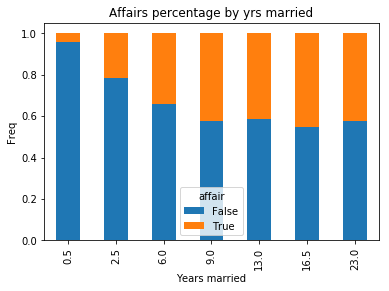

In [11]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True) 
plt.title('Affairs percentage by yrs married')
plt.xlabel('Years married')
plt.ylabel('Freq')

In [12]:
#data prep
#create intercept column and dummy var
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type = 'dataframe')
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [13]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [14]:
#fixing column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husband)[T.2.0]':'occ_husb_2',
                        'C(occupation_husband)[T.3.0]':'occ_husb_3',
                        'C(occupation_husband)[T.4.0]':'occ_husb_4',
                        'C(occupation_husband)[T.5.0]':'occ_husb_5',
                        'C(occupation_husband)[T.6.0]':'occ_husb_6'})

In [15]:
#flatten y into a 1-D array
y = np.ravel(y)

In [16]:
#initiate a model, fix X and y
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model = model.fit(X,y)

#check accuracy on the training set
model.score(X,y)

0.7265158655356582

In [17]:
#percentage having affairs
y.mean()

0.3224945020420987

In [18]:
#examine coeff
X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6',
        'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
        'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
        'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
        'children', 'religious', 'educ'],
       dtype='object'), array([[-0.01765092],
        [ 0.0504238 ],
        [ 0.36449372],
        [ 0.13295864],
        [ 0.70892318],
        [ 0.74325247],
        [ 0.14979495],
        [ 0.25665613],
        [ 0.12106861],
        [ 0.15162025],
        [ 0.16238175],
        [-0.71002934],
        [-0.06070805],
        [ 0.10769189],
        [ 0.01542287],
        [-0.37423083],
        [-0.00188587]]))

In [19]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model2 = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model2 = model2.fit(X_train, y_train)
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
#predict class lables for the test set
predicted = model2.predict(X_test)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
#Generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.59623864, 0.40376136],
       [0.80434609, 0.19565391],
       [0.8716376 , 0.1283624 ],
       ...,
       [0.5207133 , 0.4792867 ],
       [0.53834059, 0.46165941],
       [0.60720246, 0.39279754]])

In [22]:
#Generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:,1]))

0.7277486910994765
0.7455505952380953


In [23]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1174  106]
 [ 414  216]]
              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82      1280
         1.0       0.67      0.34      0.45       630

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.71      0.63      0.64      1910
weighted avg       0.72      0.73      0.70      1910



In [24]:
#model evalutaion using CV
#evaluate the model using 10 fold CV
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000),X,y, scoring = 'accuracy', cv = 10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73981191, 0.70597484, 0.70440252,
        0.73113208, 0.73427673, 0.70440252, 0.75314465, 0.74685535]),
 0.7243198083633998)

In [25]:
model.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]]))

array([[0.77543284, 0.22456716]])